# Google sheets (dataset) Integration

In [1]:
# dataset = "https://www.kaggle.com/datasets/tobiasbueck/multilingual-customer-support-tickets"

In [2]:
!pip install "gspread==6.1.3"

In [3]:
import gspread

# Using "API key"
api_key = "API_KEY"
gc = gspread.api_key(api_key)

# Can use any one of "API_KEY" or "Service Account Credentials" from the google cloud.
sh = gc.open_by_key("1sG-qMuIg3JZFQ4zsCm-R8o_pj88OSKAiGunBiDQRBmU")

In [4]:
# prompt: read sheets from sh
import pandas as pd

worksheet = sh.sheet1 # or sh.get_worksheet(0) for the first sheet

# Get all values from the worksheet
data = worksheet.get_all_values()

# Convert to DataFrame
df_sheets = pd.DataFrame(data[1:], columns=data[0])  # First row is header

df_sheets

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...,Estamos investigando urgentemente el problema ...,Incident,Technical Support,high,es,IT Services,Urgent Issue,Service Disruption,Incident Report,Service Recovery,System Maintenance,,,,
1,Anfrage zur Verfügbarkeit des Dell XPS 13 9310,"Sehr geehrter Kundenservice,\n\nich hoffe, die...","Sehr geehrter <name>,\n\nvielen Dank, dass Sie...",Request,Customer Service,low,de,Tech Online Store,Sales Inquiry,Product Support,Customer Service,Order Issue,Returns and Exchanges,,,,
2,Erro na Autocompletação de Código do IntelliJ ...,"Prezado Suporte ao Cliente <name>,\n\nEstou es...","Prezado <name>,\n\nObrigado por entrar em cont...",Incident,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Problem Resolution,Urgent Issue,IT Support,,,,
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,,
4,Problème d'affichage de MacBook Air,Cher équipe de support du magasin en ligne Tec...,"Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Product Support,low,fr,Tech Online Store,Technical Support,Product Support,Hardware Failure,Service Recovery,Routine Request,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Problem mit der HP DeskJet 3755 WLAN-Verbindung,"Sehr geehrter Tech Online Store Support, mein ...","Sehr geehrter <name>, bitte stellen Sie sicher...",Problem,Customer Service,low,de,Tech Online Store,Technical Support,Product Support,Hardware Failure,Network Issue,Problem Resolution,,,,
3996,Problemas com a impressora HP DeskJet 3755,"Olá Suporte ao Cliente,\n\nEstou escrevendo pa...",Assunto: Re: Problemas com a impressora HP Des...,Incident,Product Support,medium,pt,Tech Online Store,Technical Support,Printer Issues,Hardware Failure,Network Issue,Problem Resolution,Customer Service,,,
3997,Problema urgente con el envío,"Estimado equipo de atención al cliente, me dir...","Estimado <name>,\n\nNos disculpamos por el ret...",Incident,Service Outages and Maintenance,high,es,Online Store,Shipping Delay,Customer Service,Order Issue,Urgent Issue,Problem Resolution,,,,
3998,,"Cher Service Client, nous rencontrons des prob...","Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Technical Support,high,fr,IT Services,Technical Support,IT Support,Network Issue,Urgent Issue,Problem Resolution,Service Recovery,,,


# Response Automation

In [5]:
df_sheets['language'].value_counts()

,count
language,
en,1391
de,848
es,812
fr,476
pt,473


In [6]:
df = df_sheets.loc[df_sheets['language'] == 'en']   # Processing the english language tickets only
df.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,,
5,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,,,,
7,Service outage resolution requested for ongoin...,"Dear IT Services Customer Support,\n\nI am wri...","Dear <name>,\n\nThank you for reaching out to ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue,
8,Surface Pro 7 Issue,"Dear Tech Online Store Support Team,\n\nI hope...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,,,
10,Request for software development consultation ...,"Dear Customer Support,\n\nI hope this message ...","Dear <name>,\n\nThank you for reaching out reg...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,,,,


In [7]:
df.shape

(1391, 17)

In [8]:
# tf-idf
# term frequency - inverse document frequency
# (occ of word in sentence) * (Weighs down frequent terms and increases the weight of rare terms)


#       word1   word2   word3   word4
# row1 tf11*idf1
# row2
# row3

In [9]:
# prompt: create tf-idf for 'answer' column

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and contains the 'answer' column.
# If not loaded, load your DataFrame first. For example:
# df = pd.read_json('preprocessed_data.json')


def create_tfidf_for_answers(df):
    """
    Creates TF-IDF vectors for the 'answer' column in a DataFrame.
    """

    vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer

    # Fit and transform the 'answer' column
    tfidf_matrix = vectorizer.fit_transform(df['answer'].astype(str))

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame from the TF-IDF matrix
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    return tfidf_df

# Example Usage
tfidf_answers = create_tfidf_for_answers(df)
tfidf_answers.head()

,000,0x80300024,10,100,102,11,11th,12,123,12345678,...,your_name,yourself,youtube,zero,zip,zones,zoom,zu,zögern,über
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.178124,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.364924,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [10]:
tfidf_answers.shape

(1391, 3857)

In [11]:
tfidf_answers.columns

Index(['000', '0x80300024', '10', '100', '102', '11', '11th', '12', '123',
       '12345678',
       ...
       'your_name', 'yourself', 'youtube', 'zero', 'zip', 'zones', 'zoom',
       'zu', 'zögern', 'über'],
      dtype='object', length=3857)

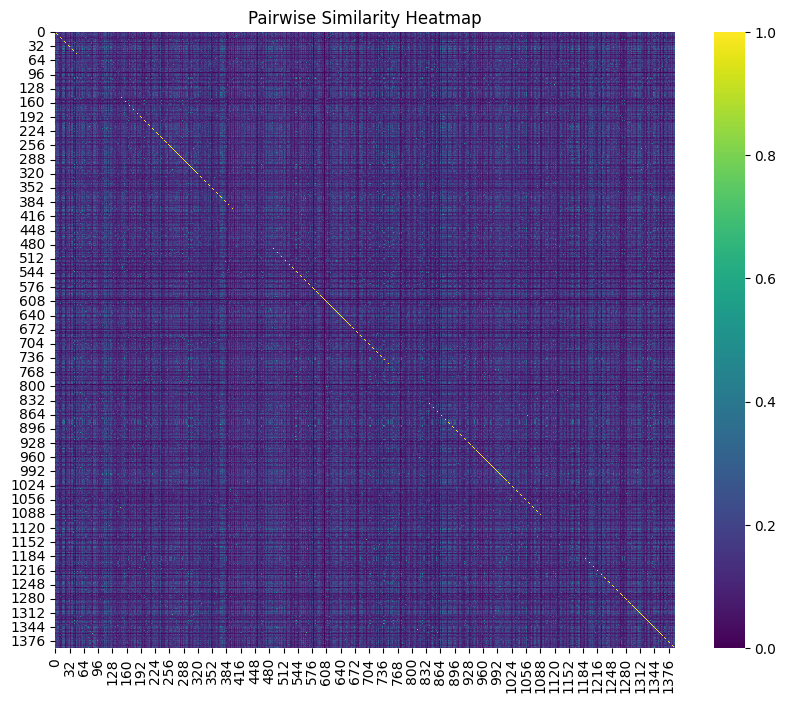

In [12]:
# prompt: calculate pairwise similarity for every row and make a heatmap of nrows x nrows

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
similarity_matrix = cosine_similarity(tfidf_answers)

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(similarity_matrix, cmap='viridis', annot=False) # annot=True to display values
plt.title('Pairwise Similarity Heatmap')
plt.show()

Explained variance ratio: [0.02939661 0.01876209 0.01534067]


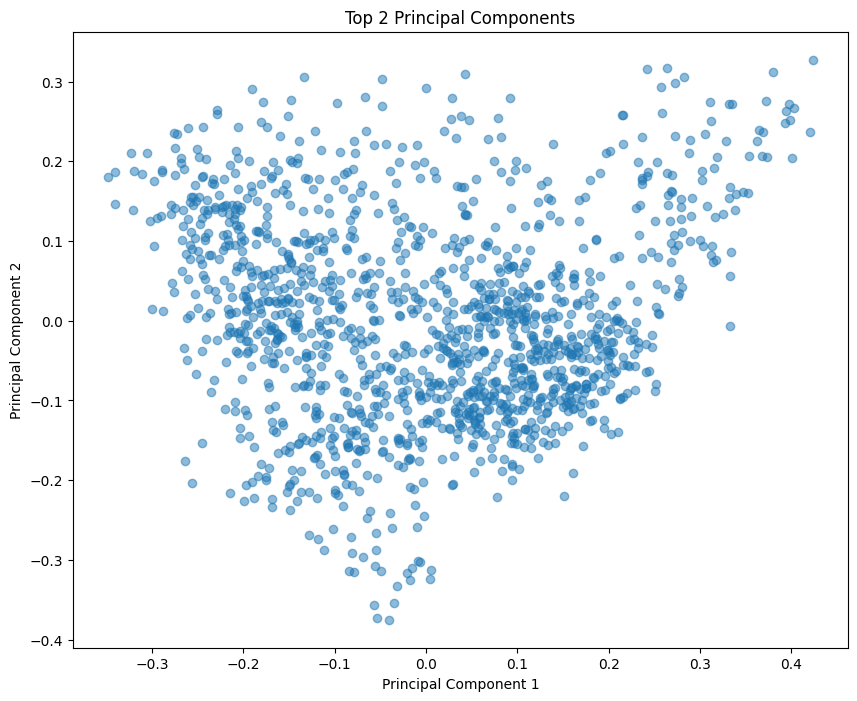

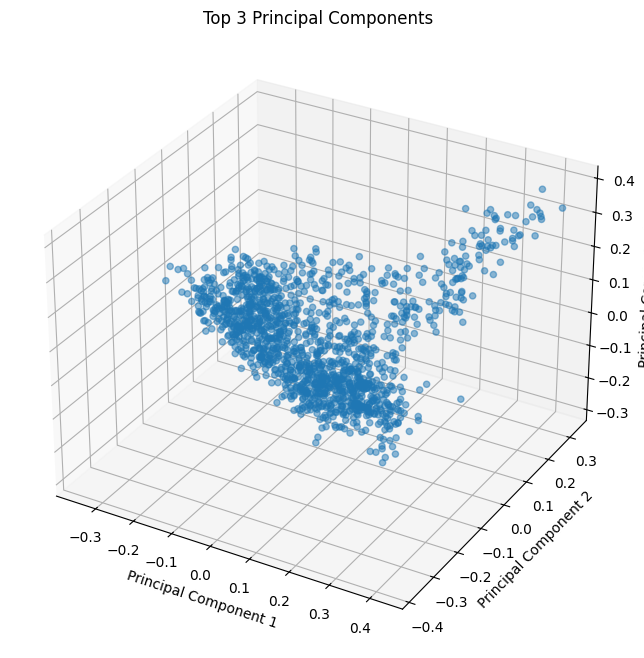

In [13]:
# prompt: use pca to find the top 3 principal components in 'tfidf_answers', draw a plot

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'tfidf_answers' DataFrame is already created from the previous code

# Initialize PCA with the desired number of components (top 3 in this case)
pca = PCA(n_components=3)

# Fit and transform the TF-IDF matrix to get the principal components
principal_components = pca.fit_transform(tfidf_answers)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

# Plotting the top 3 principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)  # Adjust alpha for transparency
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Top 2 Principal Components')

# Optional: Add labels or color coding for better visualization
# For example, if you have categories in your original DataFrame:
# plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['category'], cmap='viridis', alpha=0.5)
# plt.colorbar(label='Category')

plt.show()


# For 3D plot (optional)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Top 3 Principal Components')
plt.show()

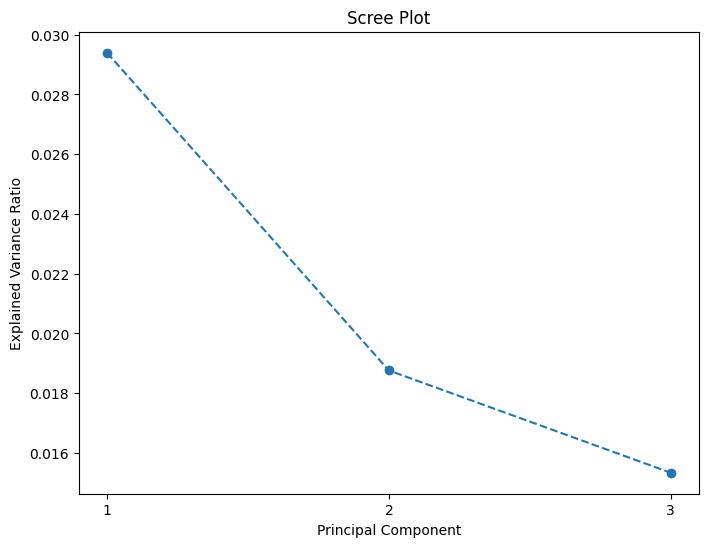

In [14]:
# prompt: use pca on 'tfidf_answers' and get top 3 pca Principal Components and draw scree plot

import matplotlib.pyplot as plt

# Assuming 'pca' object from the previous code is available

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ensure x-axis ticks are integers
plt.show()

In [15]:
pca = PCA(n_components=20)

# Fit and transform the data
pca_result = pca.fit_transform(tfidf_answers)
sum(pca.explained_variance_ratio_[:20])*100

19.229598711835482

In [16]:
pca = PCA(n_components=100)

# Fit and transform the data
pca_result = pca.fit_transform(tfidf_answers)
sum(pca.explained_variance_ratio_[:100])*100

42.29873086862039

In [17]:
# prompt: use agglomerative clustering on the pca components

import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Assuming 'pca_result' from the previous code (PCA with 100 components) is available

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)  # Adjust n_clusters as needed
cluster_labels = agg_clustering.fit_predict(pca_result)

# Add cluster labels to the pca_df
pca_df['cluster'] = cluster_labels

# Now 'pca_df' contains the principal components and the cluster assignments
print(pca_df.head())

        PC1       PC2       PC3  cluster
0 -0.261946 -0.048959  0.159247        0
1  0.074226  0.015292 -0.127178        1
2 -0.195878 -0.041089  0.105227        3
3  0.144321  0.057672 -0.142650        1
4 -0.175769 -0.003283  0.032015        3


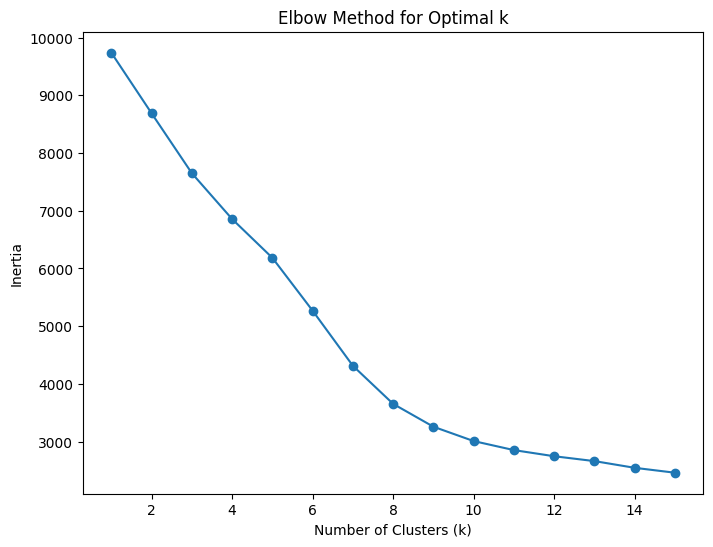

In [18]:
# prompt: use kmeans clustering and elbow bethod to find optimal numbers of clusters

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'pca_df' is your DataFrame with the principal components (from previous code)
# If not, load your DataFrame and create pca_df as shown in the previous code

pca = PCA(n_components=7)

# Fit and transform the data
pca_result = pca.fit_transform(tfidf_answers)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_result)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 16):  # Test k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 16), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [19]:
# no.of optimal clusters = 9

In [20]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=9, random_state=42)

In [21]:
df["cluster"] = kmeans.labels_

<ipython-input-21-0cfa3f8ae50d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = kmeans.labels_


In [22]:
import numpy as np
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [23]:
df.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,cluster
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,,,0
5,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,,,,,3
7,Service outage resolution requested for ongoin...,"Dear IT Services Customer Support,\n\nI am wri...","Dear <name>,\n\nThank you for reaching out to ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue,,8
8,Surface Pro 7 Issue,"Dear Tech Online Store Support Team,\n\nI hope...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,,,,7
10,Request for software development consultation ...,"Dear Customer Support,\n\nI hope this message ...","Dear <name>,\n\nThank you for reaching out reg...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,,,,,8


In [24]:
df['cluster'].value_counts()

,count
cluster,
3,305
1,214
7,156
8,152
2,152
4,124
5,112
6,99
0,77


# Categorizing dataset for automation convinence

In [25]:
# prompt: make all possible combinations of values from these columns: ["type", "queue", "priority", "language", "business_type", "tag_1", "tag_2", "cluster"]

import pandas as pd
from itertools import product

# Assuming your DataFrame 'df' is already loaded as shown in your provided code

# List of columns for combinations
columns_to_combine = ["type", "queue", "priority", "language", "business_type", "tag_1", "cluster"]

# Get unique values for each column
unique_values = {col: df[col].unique() for col in columns_to_combine}

# Generate all possible combinations
all_combinations = list(product(*unique_values.values()))

# Create a new DataFrame from the combinations
combinations_df = pd.DataFrame(all_combinations, columns=columns_to_combine)

# Print or use the combinations_df as needed
combinations_df

,type,queue,priority,language,business_type,tag_1,cluster
0,Request,IT Support,high,en,IT Services,IT Support,0
1,Request,IT Support,high,en,IT Services,IT Support,3
2,Request,IT Support,high,en,IT Services,IT Support,8
3,Request,IT Support,high,en,IT Services,IT Support,7
4,Request,IT Support,high,en,IT Services,IT Support,1
...,...,...,...,...,...,...,...
285115,Problem,Human Resources,low,en,Pit Services,Consulting Services,1
285116,Problem,Human Resources,low,en,Pit Services,Consulting Services,4
285117,Problem,Human Resources,low,en,Pit Services,Consulting Services,6
285118,Problem,Human Resources,low,en,Pit Services,Consulting Services,5


In [26]:
# prompt: For the above combinations, get total rows present in dataset for each combo, and ignore all combos with 0 rows

# Assuming your DataFrame 'df' and 'combinations_df' are already loaded as shown in your provided code

# Group by the combinations and count rows
grouped_df = df.groupby(columns_to_combine).size().reset_index(name='count')

# Filter out combinations with 0 rows
filtered_df = grouped_df[grouped_df['count'] > 0]

# Print or use the filtered_df as needed
filtered_df

,type,queue,priority,language,business_type,tag_1,cluster,count
0,Change,Billing and Payments,high,en,IT Services,Billing Issue,0,1
1,Change,Billing and Payments,low,en,IT Services,Billing Issue,6,1
2,Change,Billing and Payments,low,en,Software Development Company,Technical Support,0,1
3,Change,Billing and Payments,low,en,Tech Online Store,Billing Issue,2,1
4,Change,Billing and Payments,medium,en,IT Consulting Firm,Billing Issue,2,1
...,...,...,...,...,...,...,...,...
731,Request,Technical Support,medium,en,Online Store,Technical Support,2,1
732,Request,Technical Support,medium,en,Online Store,Technical Support,3,1
733,Request,Technical Support,medium,en,Software Development Company,Technical Support,3,2
734,Request,Technical Support,medium,en,Tech Online Store,Technical Support,3,2


In [27]:
# prompt: sort the rows according their count

# Assuming your DataFrame 'filtered_df' is already loaded as shown in your provided code

# Sort the rows according to their 'count' in descending order
sorted_df = filtered_df.sort_values(by='count', ascending=False)

# Print or use the sorted_df as needed
sorted_df

,type,queue,priority,language,business_type,tag_1,cluster,count
313,Incident,Technical Support,high,en,IT Services,Technical Support,4,24
312,Incident,Technical Support,high,en,IT Services,Technical Support,3,21
316,Incident,Technical Support,high,en,IT Services,Urgent Issue,1,18
311,Incident,Technical Support,high,en,IT Services,Technical Support,1,17
257,Incident,Product Support,medium,en,Tech Online Store,Technical Support,7,16
...,...,...,...,...,...,...,...,...
270,Incident,Sales and Pre-Sales,medium,en,IT Services,IT Support,8,1
271,Incident,Sales and Pre-Sales,medium,en,Software Development Company,Technical Support,4,1
272,Incident,Sales and Pre-Sales,medium,en,Tech Online Store,Customer Feedback,1,1
273,Incident,Sales and Pre-Sales,medium,en,Tech Online Store,Technical Support,5,1


In [28]:
sorted_df.shape

(736, 8)

In [29]:
name_columns = ["type", "queue", "priority", "language", "business_type", "tag_1", "tag_2"]

# Combine all unique names from the specified columns into a single set
all_unique_names = set()
for col in name_columns:
  print(f"the uniques of '{col}' are :-\n", df[col].unique())
  print()


the uniques of 'type' are :-
 ['Request' 'Incident' 'Change' 'Problem']

the uniques of 'queue' are :-
 ['IT Support' 'Technical Support' 'Service Outages and Maintenance'
 'Product Support' 'Billing and Payments' 'Customer Service'
 'Returns and Exchanges' 'Sales and Pre-Sales' 'General Inquiry'
 'Human Resources']

the uniques of 'priority' are :-
 ['high' 'medium' 'low']

the uniques of 'language' are :-
 ['en']

the uniques of 'business_type' are :-
 ['IT Services' 'Tech Online Store' 'IT Consulting Firm'
 'Software Development Company' 'Online Store' 'Adobe Photoshop 2024'
 'IT Consulting Service' 'Pit Services']

the uniques of 'tag_1' are :-
 ['IT Support' 'Technical Support' 'Service Outage' 'Network Issue'
 'Billing Issue' 'Urgent Issue' 'Software Bug' 'Product Support'
 'Sales Inquiry' 'Returns and Exchanges' 'Order Issue' 'Warranty Claim'
 'Login Issue' 'Refund Request' 'Account Assistance' 'Technical Guidance'
 'Service Disruption' 'Customer Service' 'General Inquiry'
 'Pay

In [30]:
# Sum of counts of each cluster

cluster_counts = sorted_df.groupby('cluster')['count'].sum().reset_index(name='counts_sum')

cluster_counts

,cluster,counts_sum
0,0,77
1,1,214
2,2,152
3,3,305
4,4,124
5,5,112
6,6,99
7,7,156
8,8,152


In [31]:
# Size of each cluster
cluster_counts = sorted_df.groupby('cluster').size().reset_index(name='cluster_size')

cluster_counts

,cluster,cluster_size
0,0,52
1,1,106
2,2,101
3,3,169
4,4,56
5,5,51
6,6,42
7,7,59
8,8,100


The clusters-3 & 1 has the max probability.

In [32]:
# prompt: merge and store the rows of sorted_df which belongs to cluster 3 & cluster 1 in to 'fianl_df'

final_df = pd.concat([sorted_df[sorted_df['cluster'] == 3], sorted_df[sorted_df['cluster'] == 1]])
final_df

,type,queue,priority,language,business_type,tag_1,cluster,count
312,Incident,Technical Support,high,en,IT Services,Technical Support,3,21
213,Incident,IT Support,medium,en,IT Services,Technical Support,3,11
255,Incident,Product Support,medium,en,Tech Online Store,Technical Support,3,8
344,Incident,Technical Support,low,en,Tech Online Store,Technical Support,3,7
202,Incident,IT Support,low,en,IT Services,Technical Support,3,7
...,...,...,...,...,...,...,...,...
291,Incident,Technical Support,high,en,IT Consulting Firm,IT Support,1,1
277,Incident,Service Outages and Maintenance,high,en,IT Services,Network Issue,1,1
276,Incident,Service Outages and Maintenance,high,en,IT Services,IT Support,1,1
275,Incident,Service Outages and Maintenance,high,en,IT Consulting Firm,Service Disruption,1,1


In [33]:
# all the rows from original dataset which belongs to cluster-3 & 1

final_df = pd.merge(df, final_df, on=['type', 'queue', 'priority', 'language', 'business_type', 'tag_1', 'cluster'], how='inner')
final_df

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,cluster,count
0,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,,,,,3,21
1,Urgent AWS Deployment Issues,"Dear IT Services Customer Support,\n\nI hope t...","Dear <name>,\n\nThank you for contacting IT Se...",Request,Technical Support,medium,en,IT Services,IT Support,Service Disruption,Urgent Issue,Technical Support,System Maintenance,Incident Report,,,,1,1
2,,"Dear Customer Care,\n\nI am encountering chall...","Dear <name>,\n\nWe appreciate you getting in t...",Problem,Technical Support,medium,en,IT Services,Technical Support,Product Support,Software Bug,Problem Resolution,Account Assistance,,,,,3,4
3,Google Chrome Extension Issue,"Dear Customer Support, I am experiencing a com...","Dear <name>,\n\nThank you for reaching out. We...",Request,Product Support,medium,en,Tech Online Store,Technical Support,Software Bug,Problem Resolution,Technical Guidance,Customer Service,,,,,3,5
4,Challenge with Instance Launch,Concern with service implementation.,"Hello, could you provide further details about...",Problem,Customer Service,medium,en,IT Services,Technical Support,Service Disruption,Problem Resolution,Product Support,,,,,,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,High Priority: Delay in Server Setup Disruptin...,"Greetings Customer Support,\n\nWe are facing a...","Dear <name>,\n\nThank you for getting in touch...",Incident,Customer Service,high,en,IT Consulting Firm,Service Disruption,Urgent Issue,Technical Support,System Maintenance,Incident Report,,,,,1,1
515,AWS Service Issues,"Hello,\nWe are experiencing replication issues...",Subject: Re: AWS Service Issues\n\nHello <name...,Incident,Technical Support,medium,en,IT Services,Technical Support,IT Support,System Crash,Service Disruption,Urgent Issue,Problem Resolution,Incident Report,,,1,4
516,AWS Deployment Issues,"Dear Customer Support Team, \n\nI am writing t...","Dear <name>,\n\nThank you for reaching out and...",Problem,Product Support,medium,en,IT Services,Technical Support,Service Disruption,Urgent Issue,Incident Report,System Maintenance,Network Issue,Problem Resolution,Technical Guidance,,1,1
517,Urgent Server Downtime Issue,"Dear Customer Support Team,\n\nWe are currentl...","Dear <name>,\n\nThank you for reaching out reg...",Problem,IT Support,high,en,IT Consulting Firm,Service Disruption,IT Support,Urgent Issue,System Maintenance,Incident Report,Technical Support,Service Recovery,,,1,1


In [34]:
final_df['body'].unique()

array(['Dear Customer Support,\n\nI am experiencing a high-priority incident wherein screen sharing fails during critical business webinar sessions using Zoom version 5.11.0. This issue is disrupting our operations and needs immediate attention.\n\nCould you please address this matter as soon as possible or direct me to someone who can assist?\n\nThank you for your urgent support.\n\nBest regards,\n\n<name>\n<acc_num>',
       'Dear IT Services Customer Support,\n\nI hope this message finds you well. I am reaching out to request urgent technical assistance with our AWS Management Service. We experienced significant server downtime over the weekend, which is impacting our operations. This issue has caused major disruptions for our team, and we need immediate help to resolve it. Please let us know if there are any specific logs or details you require from our end to expedite the troubleshooting process. Could we schedule a call at the earliest convenience to work through this issue? Your

In [35]:
# prompt: print all the unique words of body ignore the stop words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def unique_words_without_stopwords(text):
    words = re.findall(r'\b\w+\b', text.lower()) #Find all words and convert to lowercase
    unique_words = set()
    for word in words:
        if word not in stop_words:
            unique_words.add(word)
    return unique_words

# Assuming 'final_df' is already defined from the previous code
unique_words_set = set()
for body in final_df['body'].unique():
  unique_words_set.update(unique_words_without_stopwords(str(body)))

unique_words_set

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'appearing',
 'guaranteeing',
 'official',
 'ni',
 'edge',
 'result',
 'delivery',
 'many',
 'problem',
 'prompts',
 'minimize',
 'ago',
 'touchscreen',
 'unforeseen',
 'line',
 'hdr',
 'xyz',
 'leverage',
 'becomes',
 'timeframe',
 'restored',
 'recovering',
 'escalating',
 'appear',
 'relation',
 'antivirus',
 'allow',
 'numerous',
 'experiencing',
 'dell',
 '403',
 'ask',
 'hopeful',
 'smart',
 'imperative',
 'newly',
 'dispatching',
 'immediate',
 'kind',
 'achieved',
 '502',
 'workflow',
 'case',
 'ultra',
 'standards',
 'non',
 'experienced',
 'availed',
 'poor',
 'risk',
 'obtaining',
 'applying',
 'valid',
 'approaches',
 'assigned',
 'clutter',
 'instructions',
 'critical',
 'engagements',
 'efficiency',
 'clearing',
 'meantime',
 'events',
 'count',
 'progress',
 'onboarding',
 'aspire',
 'greetings',
 'interim',
 'latency',
 'agent',
 'obtained',
 'frustrations',
 'continuously',
 'anticipated',
 'incorrectly',
 'impeded',
 'cause',
 'duration',
 'diagnose',
 'depth',
 'una

In [37]:
final_df['type'].value_counts()

,count
type,
Incident,291
Request,91
Problem,91
Change,46


In [38]:
final_df['queue'].value_counts()

,count
queue,
Technical Support,224
IT Support,78
Product Support,77
Customer Service,63
Service Outages and Maintenance,40
Returns and Exchanges,9
Billing and Payments,9
Human Resources,9
Sales and Pre-Sales,8
